In [1]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    indices_to_drop = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_clean[(df_clean[col] < Q1 - 2.0*IQR) | (df_clean[col] > Q3 + 3.0*IQR)].index
        indices_to_drop.extend(outliers)
    return df_clean.drop(list(set(indices_to_drop)))

In [2]:
# Importazione delle librerie necessarie
# plotting e calcolo scientifico
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# import dati

In [3]:
df_raw = pd.read_csv('master.csv')

In [4]:
info = df_raw.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


📌 Schema delle colonne del dataset

country — 27 820 non-null — object (vedere quanty unique e quali)

year — 27 820 non-null — int64

sex — 27 820 non-null — object

age — 27 820 non-null — object — (vedere quanty unique e quali)

suicides_no — 27 820 non-null — int64 — numero di suicidi registrati

population — 27 820 non-null — int64

suicides/100k pop — 27 820 non-null — float64

country-year — 27 820 non-null — object

HDI for year — 8 364 non-null — float64 (cos'è?)

gdp_for_year ($) — 27 820 non-null — object — (da trasformare in int)

gdp_per_capita ($) — 27 820 non-null — int64

generation — object (vedere quanty unique e quali)

NOTA BENE: 
suicides/100k = suicides_no/population * 100000  

non possiamo mettere suicides_no nelle feature se suicides/100k è target



In [5]:
describe = df_raw.describe()
describe

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
head = df_raw.head(10)
head

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [7]:
df = df_raw.copy()

In [8]:
# pulizia nomi colonne
df.columns = (
    df.columns
    .str.strip()                                   # rimuove spazi iniziali/finali
    .str.replace(r'[/$() ]+', '_', regex=True)   # sostituisce simboli e spazi con _
    .str.replace(r'_{2,}', '_', regex=True)        # rimuove doppi underscore
    .str.replace(r'_+($)', '', regex=True)           # rimuove underscore finali
    .str.lower()                                   # tutto minuscolo (opzionale)
)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country-year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [9]:
#trasf gdp for year in int
df['gdp_for_year'] = (
    df['gdp_for_year']
    .astype(str)            # garantisce che sia interpretata come stringa
    .str.replace(',', '')   # rimuove le virgole che separano le migliaia
    .str.strip()            # toglie eventuali spazi
    .astype(int)            # converte in intero
)

#imputazione hdi

In [10]:
# imputazione di hdi_for_year
# Mediana per country-year
df['hdi_for_year'] = df['hdi_for_year'].fillna(
    df.groupby(['country', 'year'])['hdi_for_year'].transform('median')
)

# Mediana per country
df['hdi_for_year'] = df['hdi_for_year'].fillna(
    df.groupby('country')['hdi_for_year'].transform('median')
)

In [11]:
df[df['hdi_for_year'].isna()].groupby('country').size().sort_values(ascending=False)

country
Puerto Rico              372
Republic of Korea        372
Russian Federation       324
Aruba                    168
Kiribati                 132
Saint Kitts and Nevis     36
San Marino                36
Dominica                  12
Cabo Verde                12
Macau                     12
Mongolia                  10
dtype: int64

In [12]:
# Dizionario HDI ufficiali (ultima annata UNDP disponibile)
hdi_values = {
    'Republic of Korea': 0.937,
    'Russian Federation': 0.832,
    'Cabo Verde': 0.662,
    'Mongolia': 0.739,
    'Saint Kitts and Nevis': 0.778,
    # Per gli altri non abbiamo dati UNDP ufficiali recenti
    # imputiamo -1
    'Puerto Rico': -1,
    'Aruba': -1,
    'Kiribati': -1,
    'San Marino': -1,
    'Macau': -1,
    'Dominica': -1,
}

# Applica l’imputazione
df['hdi_for_year'] = df.apply(
    lambda r: hdi_values.get(r['country'], r['hdi_for_year']),
    axis=1
)

df['hdi_for_year'].isna().sum()

np.int64(0)

In [13]:
df.drop(columns=['country-year', 'suicides_no'], inplace=True)

In [14]:
info_cleaned = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   population         27820 non-null  int64  
 5   suicides_100k_pop  27820 non-null  float64
 6   hdi_for_year       27820 non-null  float64
 7   gdp_for_year       27820 non-null  int64  
 8   gdp_per_capita     27820 non-null  int64  
 9   generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ MB


col_0            counts
generation             
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470


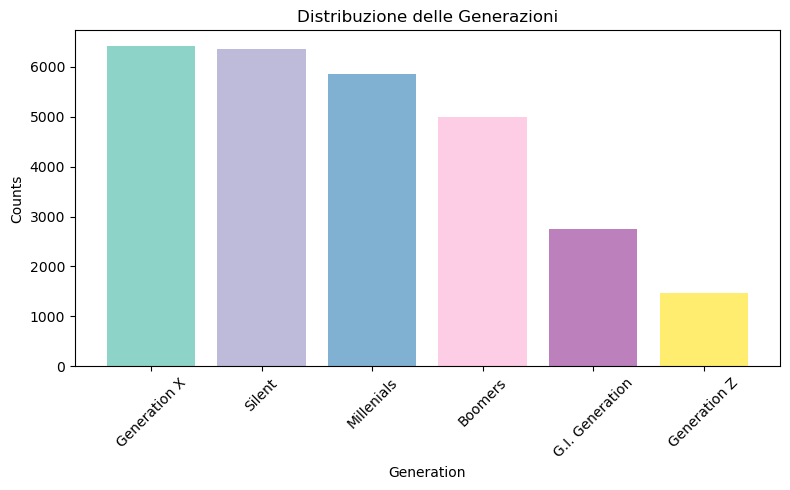

In [15]:
generations = (
    pd.crosstab(index=df['generation'], columns='counts')
      .sort_values('counts', ascending=False)
)

print(generations)
# Genera una lista di colori diversi (uno per barra)
colors = plt.cm.Set3(np.linspace(0, 1, len(generations)))

# Plot
plt.figure(figsize=(8,5))
plt.bar(generations.index, generations['counts'], color=colors)

plt.title("Distribuzione delle Generazioni")
plt.xlabel("Generation")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


col_0        counts
age                
15-24 years    4642
25-34 years    4642
35-54 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610


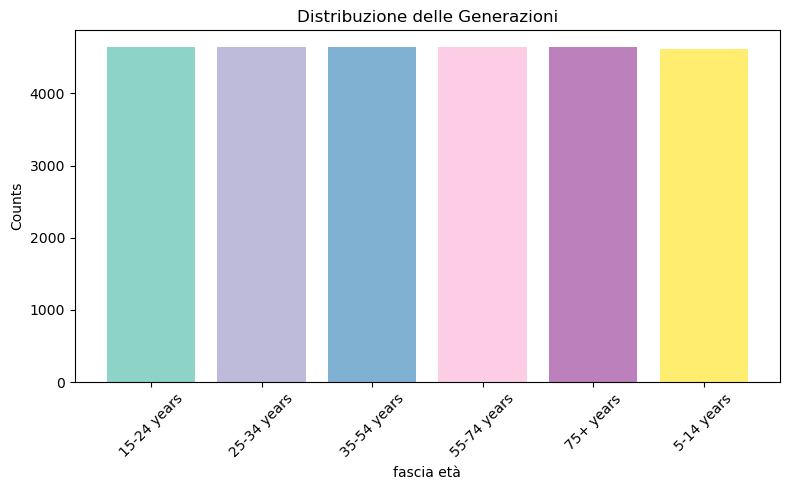

In [16]:
ages = (
    pd.crosstab(index=df['age'], columns='counts')
      .sort_values('counts', ascending=False)
)

print(ages)
# Genera una lista di colori diversi (uno per barra)
colors = plt.cm.Set3(np.linspace(0, 1, len(ages)))

# Plot
plt.figure(figsize=(8,5))
plt.bar(ages.index, ages['counts'], color=colors)

plt.title("Distribuzione delle Generazioni")
plt.xlabel("fascia età")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


col_0                   counts
country                       
Austria                    382
Mauritius                  382
Netherlands                382
Iceland                    382
Brazil                     372
...                        ...
Bosnia and Herzegovina      24
Dominica                    12
Cabo Verde                  12
Macau                       12
Mongolia                    10

[101 rows x 1 columns]


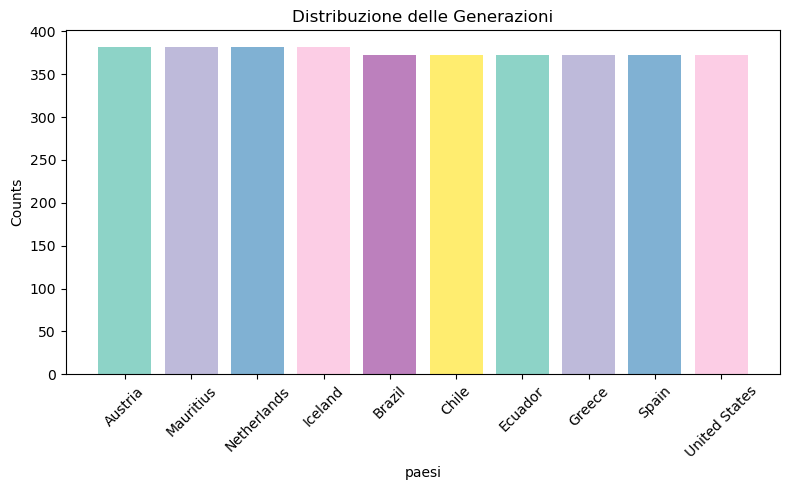

In [17]:
countries = (
    pd.crosstab(index=df['country'], columns='counts')
      .sort_values('counts', ascending=False)
)

print(countries)
top_10 = countries[:10]
# Genera una lista di colori diversi (uno per barra)
colors = plt.cm.Set3(np.linspace(0, 1, len(ages)))

# Plot
plt.figure(figsize=(8,5))
plt.bar(top_10.index, top_10['counts'], color=colors)

plt.title("Distribuzione delle Generazioni")
plt.xlabel("paesi")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
numeric = df.select_dtypes(include = ('int64', 'float64'))
numeric


,year,population,suicides_100k_pop,hdi_for_year,gdp_for_year,gdp_per_capita
0,1987,312900,6.71,0.6755,2156624900,796
1,1987,308000,5.19,0.6755,2156624900,796
2,1987,289700,4.83,0.6755,2156624900,796
3,1987,21800,4.59,0.6755,2156624900,796
4,1987,274300,3.28,0.6755,2156624900,796
...,...,...,...,...,...,...
27815,2014,3620833,2.96,0.6750,63067077179,2309
27816,2014,348465,2.58,0.6750,63067077179,2309
27817,2014,2762158,2.17,0.6750,63067077179,2309
27818,2014,2631600,1.67,0.6750,63067077179,2309


## pair plot

Generazione del grafico in corso...


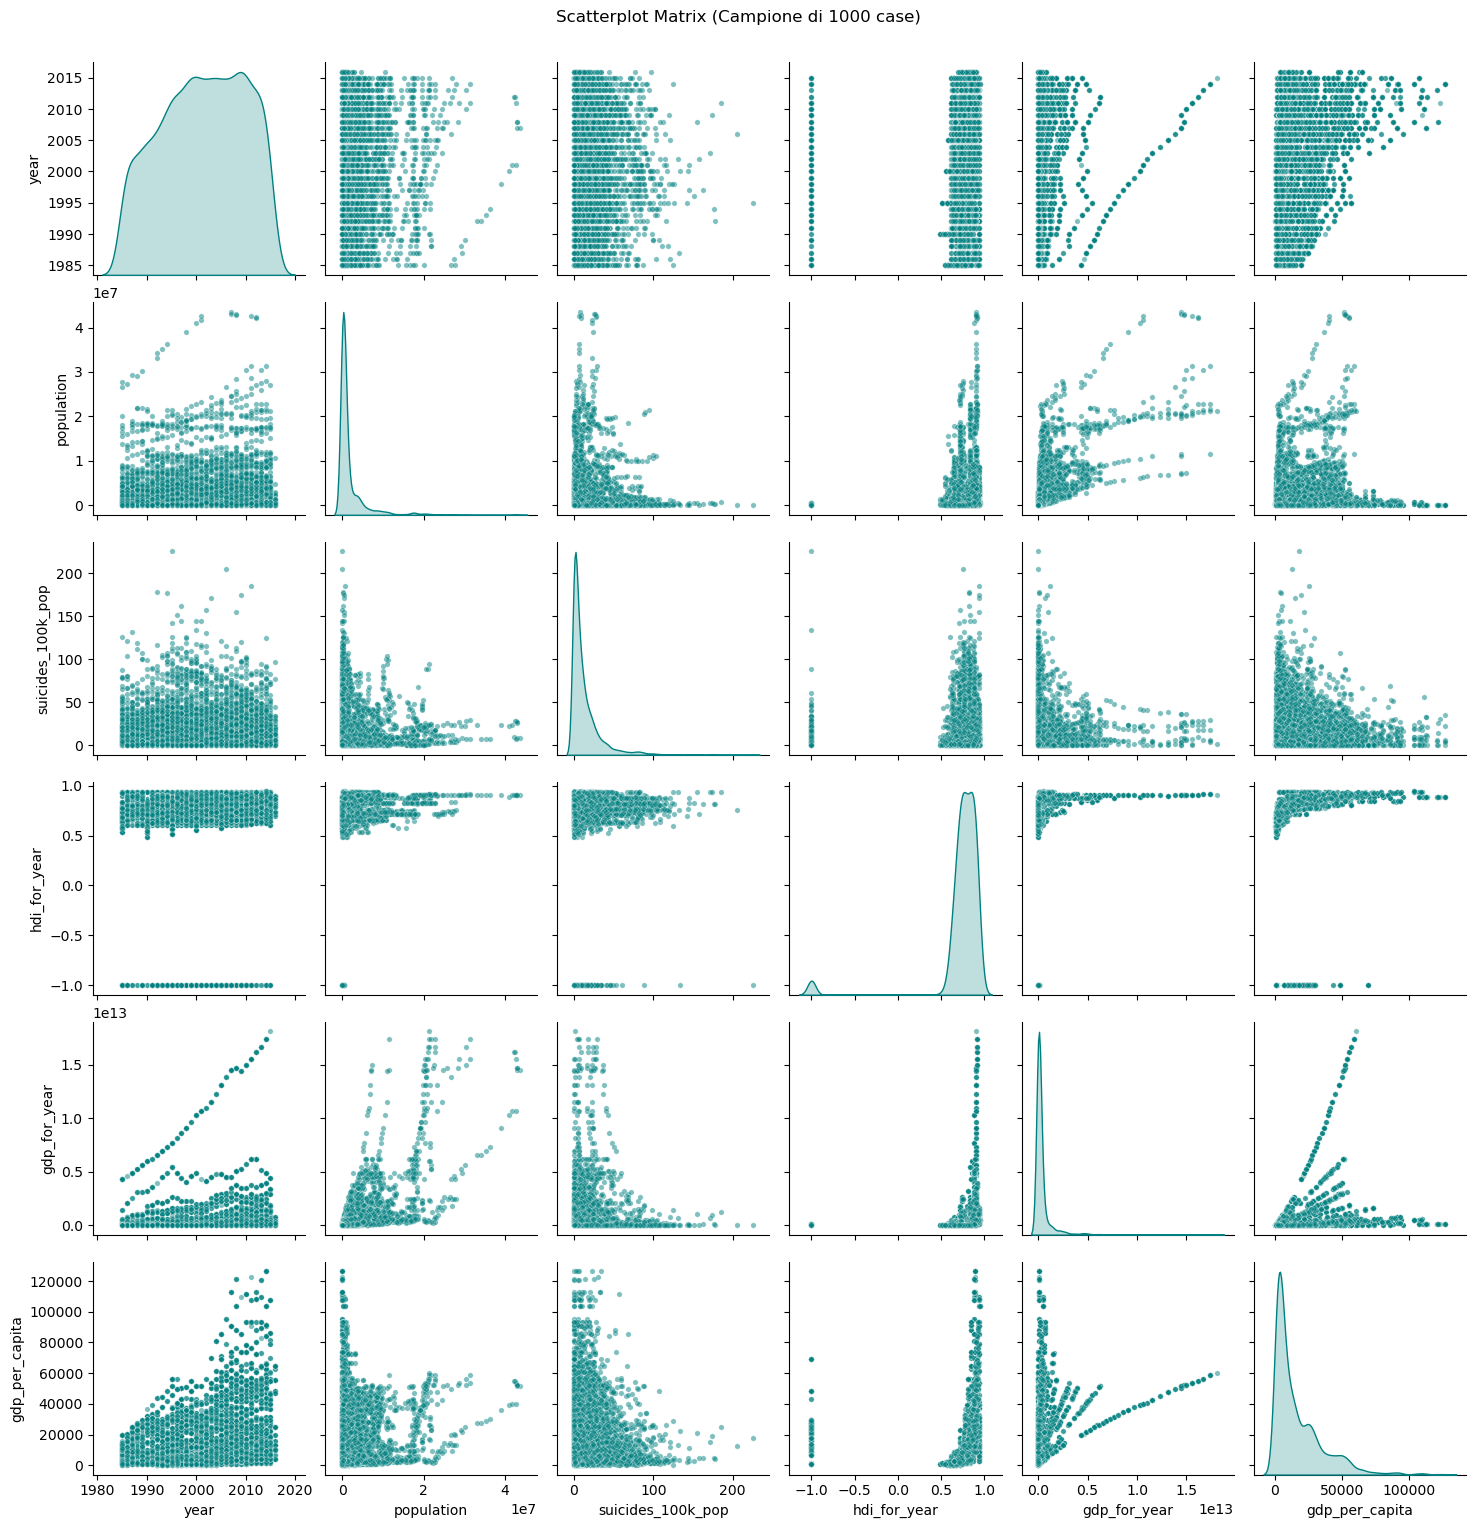

In [19]:
# 1. Selezione delle Feature più interessanti
# Escludiamo Lat/Lon (che vanno mappate, non scatterate) e variabili ridondanti
numeric = df.select_dtypes(include = ('int64', 'float64'))
cols_to_plot = numeric.columns

# 2. Campionamento dei dati
# Prendiamo un campione di 1000 righe casuali per evitare un "muro di inchiostro"
df_sample = df[cols_to_plot].sample(n=10000, random_state=42)

# 3. Creazione del Pairplot
# kind='scatter': usa i punti per le relazioni
# diag_kind='kde': usa le curve di densità sulla diagonale (invece degli istogrammi)
# plot_kws={'alpha': 0.5}: rende i punti semi-trasparenti per vedere le sovrapposizioni
print("Generazione del grafico in corso...")
g = sns.pairplot(df_sample, 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

g.fig.suptitle('Scatterplot Matrix (Campione di 1000 case)', y=1.02)
plt.show()

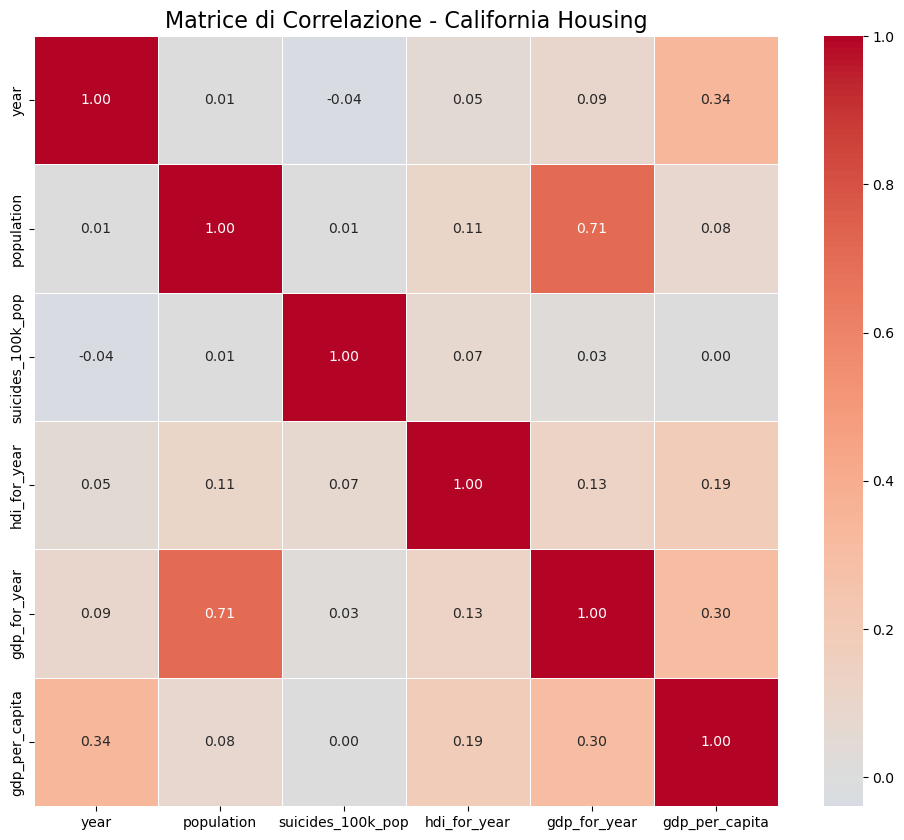

In [20]:
# 1. Calcolo la matrice di correlazione (coefficiente di Pearson)
# Nota: Se hai 'df_clean' dall'analisi precedente usa quello, altrimenti usa 'df'
corr_matrix = numeric.corr()

# 2. Setup della figura
plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
# annot=True: scrive i numeri nelle celle
# cmap='coolwarm': Rosso=Positivo, Blu=Negativo, Bianco=Neutro
# fmt=".2f": arrotonda a 2 decimali per leggibilità
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - California Housing', fontsize=16)
plt.show()

# rimozione outliers

In [21]:
'''columns_to_clean = ['suicides_no', 'suicides_100k_pop','population','gdp_for_year']
df_outliers_removed = remove_outliers_iqr(df, columns_to_clean)'''

"columns_to_clean = ['suicides_no', 'suicides_100k_pop','population','gdp_for_year']\ndf_outliers_removed = remove_outliers_iqr(df, columns_to_clean)"

In [22]:
df.columns

Index(['country', 'year', 'sex', 'age', 'population', 'suicides_100k_pop',
       'hdi_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

## divisione per continenti + aggiunta info posizione

In [23]:
import country_converter as coco

# converto i paesi del tuo df
df['continent'] = coco.convert(names=df['country'], to='continent')

In [47]:
# Carica il mondo
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)


# Centroidi per lat/lon
world['lat'] = world.geometry.centroid.y
world['lon'] = world.geometry.centroid.x

# Prendi solo i paesi presenti nel tuo df
paesi_presenti = df['country'].unique()

# Filtra world solo per quei paesi
world_subset = world[world['name'].isin(paesi_presenti)]

# Crea un dizionario {paese: (lat, lon)}
coords_dict = {row['name']: (row['lat'], row['lon']) for _, row in world_subset.iterrows()}

# Assegna le colonne lat/lon al df in modo veloce usando map
df['lat'] = df['country'].map(lambda x: coords_dict.get(x, None))
df['lon'] = df['country'].map(lambda x: coords_dict.get(x, None))

C:\Users\m-rog\AppData\Local\Temp\ipykernel_6512\674528534.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['lat'] = world.geometry.centroid.y
C:\Users\m-rog\AppData\Local\Temp\ipykernel_6512\674528534.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['lon'] = world.geometry.centroid.x


KeyError: 'name'

In [44]:
import sys
!{sys.executable} -m pip install geopandas

   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/22.9 MB ? eta -:--:--
    ----------------

# Tasso di suicidi per genere/età

In [24]:
suicides_age_sex = df.pivot_table(
    index='age',
    columns='sex',
    values='suicides_100k_pop',
    aggfunc='mean'
)
age_order = [
    '5-14 years',
    '15-24 years',
    '25-34 years',
    '35-54 years',
    '55-74 years',
    '75+ years'
]
suicides_age_sex = suicides_age_sex.loc[age_order]

tabella_eta = suicides_age_sex
suicides_age_sex


sex,female,male
age,,
5-14 years,0.462252,0.777831
15-24 years,4.328018,13.566290
25-34 years,4.573210,19.800560
35-54 years,5.916480,23.978402
55-74 years,7.123447,25.187712
75+ years,9.919802,37.991017


In [25]:
# Creazione figura e asse
fig_eta, ax_eta = plt.subplots(figsize=(10,6))

# Plot dei dati
suicides_age_sex.plot(
    kind='bar',
    ax=ax_eta,
    width=0.8
)

# Personalizzazioni
ax_eta.set_title("Suicides per 100k - Media per Età e Sesso")
ax_eta.set_xlabel("Age Group")
ax_eta.set_ylabel("Suicidi per 100k (mean)")
ax_eta.set_xticklabels(suicides_age_sex.index, rotation=45)
ax_eta.legend(title="Sex")
plt.tight_layout()

# Non mostrare subito il plot
plt.close(fig_eta)

# Assegniamo la figura alla variabile per il menù
grafico_eta = fig_eta



# tasso suicidi per reddito

In [26]:
df['gdp_per_capita'].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita, dtype: float64

In [27]:
bins = [0, 1000, 4000, 8000, 16000, 32000, df['gdp_per_capita'].max()]

labels = ['Molto basso', 'Basso', 'Medio basso', 'medio', 'Medio alto', 'Alto']

df['fasce_gdp'] = pd.cut(
    df['gdp_per_capita'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [28]:
suicides_income = df.pivot_table(
    index='fasce_gdp',
    values='suicides_100k_pop',
    aggfunc='mean'
)
suicides_income

C:\Users\m-rog\AppData\Local\Temp\ipykernel_6512\2555484784.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  suicides_income = df.pivot_table(


,suicides_100k_pop
fasce_gdp,
Molto basso,11.142058
Basso,13.216899
Medio basso,12.135443
medio,12.382580
Medio alto,13.909179
Alto,12.700106


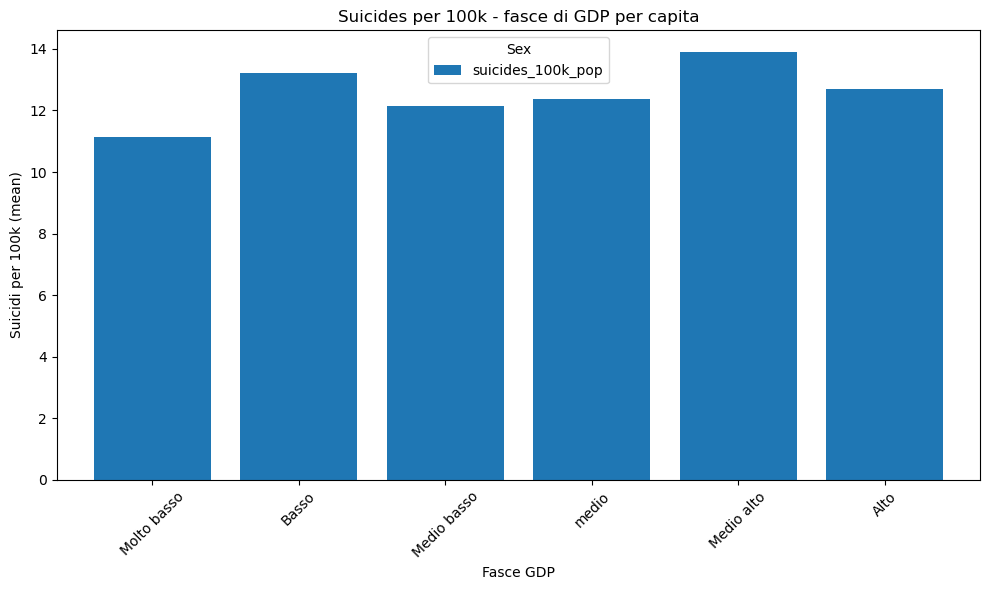

In [29]:
# Creazione figura e asse
fig_gdp, ax_gdp = plt.subplots(figsize=(10,6))

# Plot dei dati
suicides_income.plot(
    kind='bar',
    ax=ax_gdp,
    width=0.8
)

# Personalizzazioni
ax_gdp.set_title("Suicides per 100k - fasce di GDP per capita")
ax_gdp.set_xlabel('Fasce GDP')
ax_gdp.set_ylabel("Suicidi per 100k (mean)")
ax_gdp.set_xticklabels(suicides_income.index, rotation=45)
ax_gdp.legend(title="Sex")
plt.tight_layout()

# Non mostrare subito il plot
plt.close(fig_gdp)

# Assegniamo la figura alla variabile per il menù
grafico_gdp = fig_gdp
grafico_gdp

non ci sono differenze significative, ma sono fasce di gdp per capita non di reddito all'interno di uno stesso paese

In [30]:
df.columns

Index(['country', 'year', 'sex', 'age', 'population', 'suicides_100k_pop',
       'hdi_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'continent', 'fasce_gdp'],
      dtype='object')

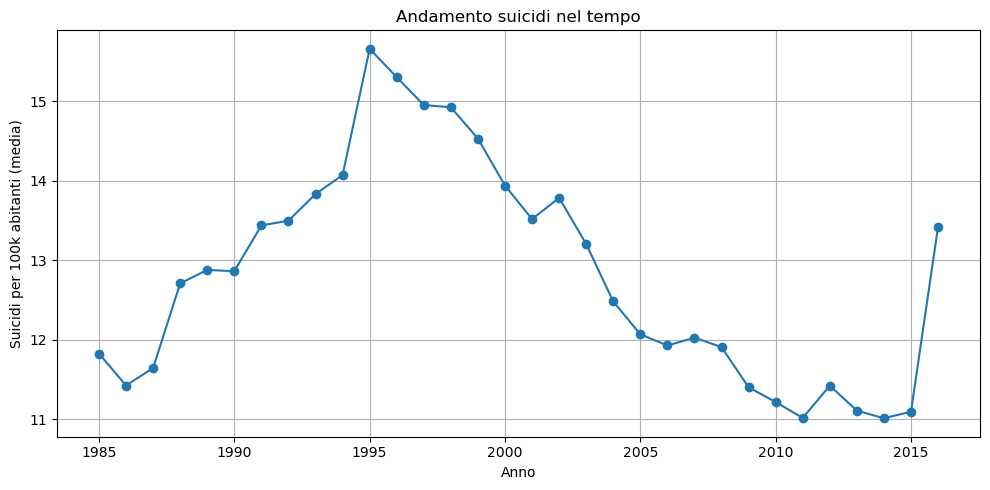

In [31]:
# Creazione figura e asse
fig_time, ax_time = plt.subplots(figsize=(10,5))

# Plot dei dati
df.groupby('year')['suicides_100k_pop'].mean().plot(ax=ax_time, marker='o')
ax_time.set_xlabel("Anno")
ax_time.set_ylabel("Suicidi per 100k abitanti (media)")
ax_time.set_title("Andamento suicidi nel tempo")
ax_time.grid(True)

plt.tight_layout()

# Non mostrare subito il plot
plt.close(fig_time)

# Assegniamo la figura alla variabile per il menù
grafico_suicidi_tempo = fig_time
fig_time


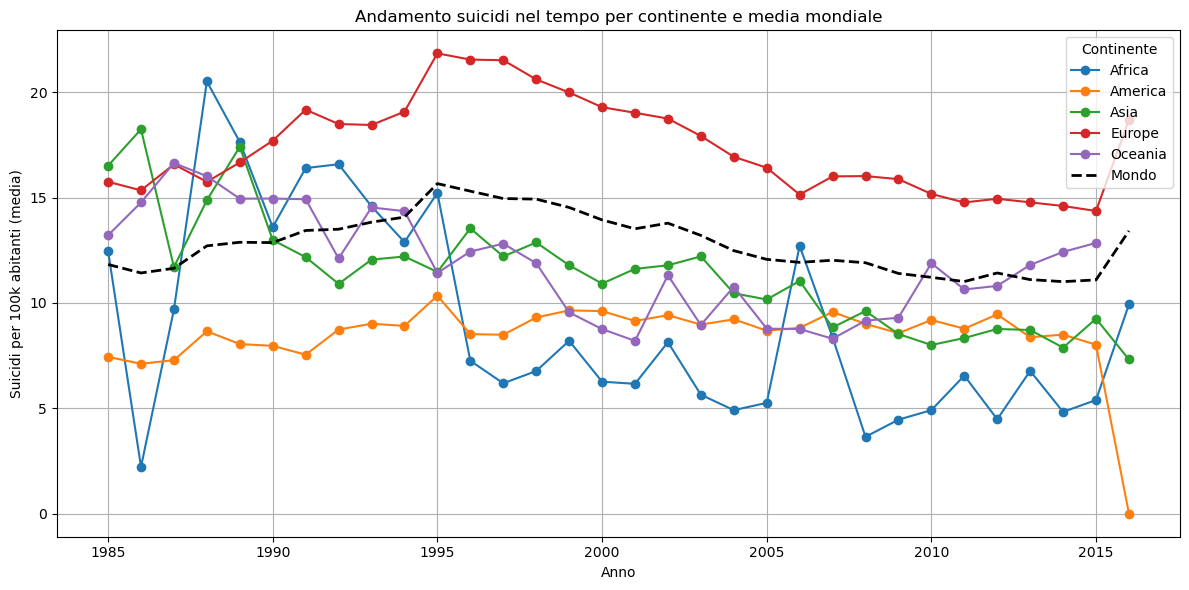

In [32]:
# Calcolo della media per anno e continente
year_continent = (
    df.groupby(['year', 'continent'])['suicides_100k_pop']
      .mean()
      .reset_index()
)

# Calcolo della media mondiale per anno
world_avg = df.groupby('year')['suicides_100k_pop'].mean()

# Creazione figura e asse
fig_cont, ax_cont = plt.subplots(figsize=(12,6))

# Linee per ciascun continente
for cont in year_continent['continent'].unique():
    subset = year_continent[year_continent['continent'] == cont]
    ax_cont.plot(subset['year'], subset['suicides_100k_pop'], marker='o', label=cont)

# Linea mondiale tratteggiata
ax_cont.plot(world_avg.index, world_avg.values, 'k--', linewidth=2, label='Mondo')

# Personalizzazioni
ax_cont.set_xlabel("Anno")
ax_cont.set_ylabel("Suicidi per 100k abitanti (media)")
ax_cont.set_title("Andamento suicidi nel tempo per continente e media mondiale")
ax_cont.grid(True)
ax_cont.legend(title="Continente")

plt.tight_layout()

# Non mostrare subito il plot
plt.close(fig_cont)

# Assegniamo la figura alla variabile per il menù
grafico_suicidi_tempo_per_paese = fig_cont
grafico_suicidi_tempo_per_paese

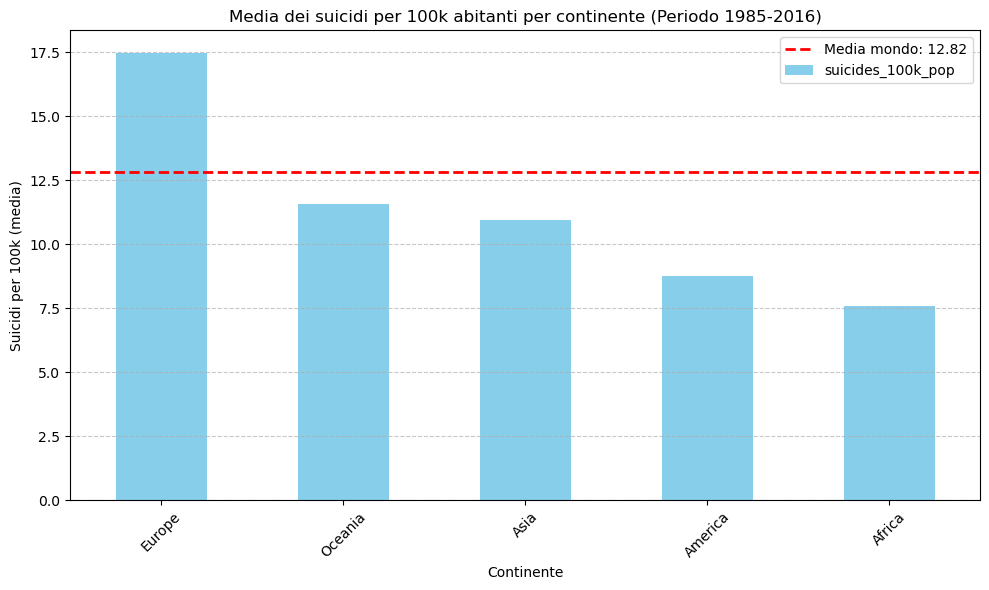

In [33]:
# Media suicidi per continente
continent_avg = df.groupby('continent')['suicides_100k_pop'].mean().sort_values(ascending=False)

# Media mondiale
world_avg = df['suicides_100k_pop'].mean()

# Creazione figura e asse
fig_cont_bar, ax_cont_bar = plt.subplots(figsize=(10,6))

# Plot a barre
continent_avg.plot(kind='bar', color='skyblue', ax=ax_cont_bar)

# Linea orizzontale della media mondiale
ax_cont_bar.axhline(y=world_avg, color='red', linestyle='--', linewidth=2, label=f'Media mondo: {world_avg:.2f}')

# Personalizzazioni
ax_cont_bar.set_title("Media dei suicidi per 100k abitanti per continente (Periodo 1985-2016)")
ax_cont_bar.set_xlabel("Continente")
ax_cont_bar.set_ylabel("Suicidi per 100k (media)")
ax_cont_bar.set_xticklabels(continent_avg.index, rotation=45)
ax_cont_bar.grid(axis='y', linestyle='--', alpha=0.7)
ax_cont_bar.legend()
plt.tight_layout()

# Non mostrare subito il plot
plt.close(fig_cont_bar)

# Assegniamo la figura alla variabile per il menù
grafico_suicidi_per_continente = fig_cont_bar
grafico_suicidi_per_continente

In [34]:
df['population'].describe()

count    2.782000e+04
mean     1.844794e+06
std      3.911779e+06
min      2.780000e+02
25%      9.749850e+04
50%      4.301500e+05
75%      1.486143e+06
max      4.380521e+07
Name: population, dtype: float64

C:\Users\m-rog\AppData\Local\Temp\ipykernel_6512\2598326681.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  suicides_by_pop = df.groupby('fasce_popolazione_num')['suicides_100k_pop'].mean()


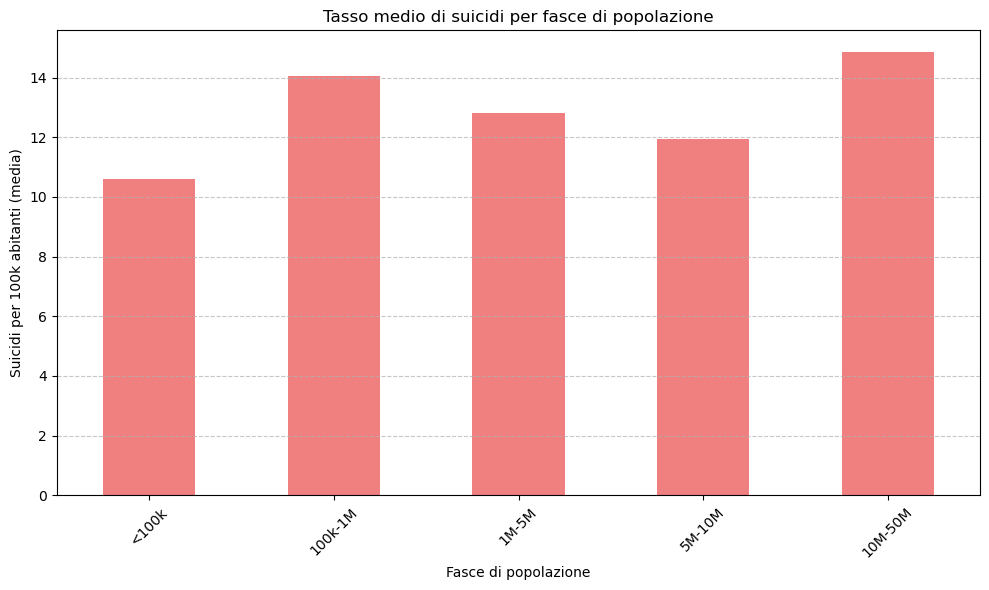

In [35]:
# Definiamo fasce numeriche più bilanciate
# Tagli più fini al centro (popolazione 1M–10M) dove ci sono molti paesi
bins = [0, 100000, 1000000, 5000000, 10000000, 50000000]  
labels = ['<100k', '100k-1M', '1M-5M', '5M-10M', '10M-50M']

df['fasce_popolazione_num'] = pd.cut(
    df['population'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Calcoliamo media suicidi per fascia
suicides_by_pop = df.groupby('fasce_popolazione_num')['suicides_100k_pop'].mean()

# Grafico a barre
plt.figure(figsize=(10,6))
suicides_by_pop.plot(kind='bar', color='lightcoral')
plt.title("Tasso medio di suicidi per fasce di popolazione")
plt.xlabel("Fasce di popolazione")
plt.ylabel("Suicidi per 100k abitanti (media)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# paesi con più e meno suicidi

In [36]:
# Calcolo della media suicidi per paese
suicidi_per_paese = df.groupby('country')['suicides_100k_pop'].mean().sort_values(ascending=False)

# Primi 10 e ultimi 10
top10_paesi = suicidi_per_paese.head(10).round(2)
bottom10_paesi = suicidi_per_paese.tail(10).round(2)

# Uniamo in un'unica tabella
tabella_suicidi_paesi = pd.concat([top10_paesi, bottom10_paesi])

# Visualizzazione
tabella_suicidi_paesi = tabella_suicidi_paesi.reset_index()
tabella_suicidi_paesi.columns = ['Paese', 'Suicidi per 100k (media)']

tabella_suicidi_paesi

,Paese,Suicidi per 100k (media)
0,Lithuania,40.42
1,Sri Lanka,35.30
2,Russian Federation,34.89
3,Hungary,32.76
4,Belarus,31.08
5,Kazakhstan,30.51
6,Latvia,29.26
7,Slovenia,27.83
8,Estonia,27.28
9,Ukraine,26.58


In [37]:
# Calcolo della media suicidi per paese
suicidi_per_paese = df.groupby('country')['suicides_100k_pop'].mean().sort_values(ascending=False)

# Top 10
top10_paesi = suicidi_per_paese.head(10).reset_index()
top10_paesi.columns = ['Paese', 'Suicidi per 100k (media)']

# Bottom 10
bottom10_paesi = suicidi_per_paese.tail(10).reset_index()
bottom10_paesi.columns = ['Paese', 'Suicidi per 100k (media)']

# Visualizzazione
print("=== Top 10 paesi per tasso di suicidi ===")
display(top10_paesi)

print("\n=== Bottom 10 paesi per tasso di suicidi ===")
display(bottom10_paesi)

=== Top 10 paesi per tasso di suicidi ===


,Paese,Suicidi per 100k (media)
0,Lithuania,40.415573
1,Sri Lanka,35.295152
2,Russian Federation,34.892377
3,Hungary,32.761516
4,Belarus,31.075913
5,Kazakhstan,30.511282
6,Latvia,29.259325
7,Slovenia,27.827857
8,Estonia,27.276905
9,Ukraine,26.582321



=== Bottom 10 paesi per tasso di suicidi ===


,Paese,Suicidi per 100k (media)
0,Maldives,1.367333
1,United Arab Emirates,1.317917
2,Bahamas,1.247391
3,Kuwait,1.186433
4,South Africa,0.964542
5,Oman,0.736111
6,Antigua and Barbuda,0.552901
7,Jamaica,0.521765
8,Dominica,0.000000
9,Saint Kitts and Nevis,0.000000


In [38]:
# Calcolo media suicidi per continente e paese
suicidi_per_continente = df.groupby(['continent','country'])['suicides_100k_pop'].mean().reset_index()

# Funzione per ottenere top N e bottom N per continente
def top_bottom_per_continent_table(df_cont, n=5):
    result = {}
    for cont, group in df_cont.groupby('continent'):
        top = group.sort_values('suicides_100k_pop', ascending=False).head(n)
        bottom = group.sort_values('suicides_100k_pop', ascending=True).head(n)
        
        # Creiamo due colonne per top: Paese e Tasso
        top_df = pd.DataFrame({
            f'{cont} - Paese': top['country'].values,
            f'{cont} - Suicidi/100k': top['suicides_100k_pop'].values
        })
        # Stesso per bottom
        bottom_df = pd.DataFrame({
            f'{cont} - Paese': bottom['country'].values,
            f'{cont} - Suicidi/100k': bottom['suicides_100k_pop'].values
        })
        
        # Aggiungiamo a result con chiave top e bottom
        result[cont] = {'top': top_df, 'bottom': bottom_df}
    return result

# Creiamo le tabelle
tabella_continente = top_bottom_per_continent_table(suicidi_per_continente, n=5)

# Esempio: concatenazione top per tutti i continenti in un'unica tabella
top_list = [v['top'] for v in tabella_continente.values()]
bottom_list = [v['bottom'] for v in tabella_continente.values()]

# Concatenazione orizzontale (axis=1)
tabella_top_continente = pd.concat(top_list, axis=1)
tabella_bottom_continente = pd.concat(bottom_list, axis=1)

# Aggiungiamo indice posizione
tabella_top_continente.index = range(1,6)
tabella_bottom_continente.index = range(1,6)

# Visualizzazione
print("=== Top 5 paesi per tasso di suicidi per continente ===")
display(tabella_top_continente)

print("\n=== Bottom 5 paesi per tasso di suicidi per continente ===")
display(tabella_bottom_continente)

=== Top 5 paesi per tasso di suicidi per continente ===


,Africa - Paese,Africa - Suicidi/100k,America - Paese,America - Suicidi/100k,Asia - Paese,Asia - Suicidi/100k,Europe - Paese,Europe - Suicidi/100k,Oceania - Paese,Oceania - Suicidi/100k
1,Mauritius,11.687382,Guyana,22.186400,Sri Lanka,35.295152,Lithuania,40.415573,New Zealand,14.391724
2,Cabo Verde,11.153333,Suriname,21.316429,Kazakhstan,30.511282,Russian Federation,34.892377,Australia,12.992806
3,Seychelles,7.480093,Cuba,21.222049,Republic of Korea,25.135618,Hungary,32.761516,Kiribati,6.655379
4,South Africa,0.964542,Uruguay,19.461190,Japan,21.573199,Belarus,31.075913,Fiji,5.105000
5,NaN,NaN,Trinidad and Tobago,13.825648,Mongolia,18.439000,Latvia,29.259325,NaN,NaN



=== Bottom 5 paesi per tasso di suicidi per continente ===


,Africa - Paese,Africa - Suicidi/100k,America - Paese,America - Suicidi/100k,Asia - Paese,Asia - Suicidi/100k,Europe - Paese,Europe - Suicidi/100k,Oceania - Paese,Oceania - Suicidi/100k
1,South Africa,0.964542,Dominica,0.000000,Oman,0.736111,Albania,3.502879,Fiji,5.105000
2,Seychelles,7.480093,Saint Kitts and Nevis,0.000000,Kuwait,1.186433,San Marino,4.045000,Kiribati,6.655379
3,Cabo Verde,11.153333,Jamaica,0.521765,United Arab Emirates,1.317917,Greece,4.064839,Australia,12.992806
4,Mauritius,11.687382,Antigua and Barbuda,0.552901,Maldives,1.367333,Bosnia and Herzegovina,4.617083,New Zealand,14.391724
5,NaN,NaN,Bahamas,1.247391,Qatar,1.787360,Malta,5.032285,NaN,NaN


In [39]:
# Conta numero di paesi unici per continente
paesi_per_continente = df.groupby('continent')['country'].nunique()

for cont, num_paesi in paesi_per_continente.items():
    print(f"{cont}: {num_paesi} paesi")
    
    # Se meno di 10, stampa anche i nomi
    if num_paesi < 10:
        nomi_paesi = df[df['continent'] == cont]['country'].unique()
        print("Paesi presenti:", ", ".join(nomi_paesi))
    print("-" * 40)

Africa: 4 paesi
Paesi presenti: Cabo Verde, Mauritius, Seychelles, South Africa
----------------------------------------
America: 31 paesi
----------------------------------------
Asia: 24 paesi
----------------------------------------
Europe: 38 paesi
----------------------------------------
Oceania: 4 paesi
Paesi presenti: Australia, Fiji, Kiribati, New Zealand
----------------------------------------


# Menu

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def mostra_menu():
    menu = widgets.Dropdown(
        options=[
            ("Seleziona un'analisi", None),
            ("1. Tabella suicidi per età e sesso", "eta_table"),
            ("2. Grafico suicidi per età e sesso", "eta_plot"),
            ("3. Grafico suicidi nel tempo", "df_desc"),
            ("4. Correlazione GDP", "gdp_corr"),
            ("6. Grafico suicidi nel tempo per continente", "plot_tempo_per_cont"),
            ("7. Tabella paesi con pù e meno suicidi", "tabella_paesi_suicidi"),
            ("8. Grafico suicidi per continente", "suicidi_per_continente"),
        ],
        description="Analisi:",
        layout=widgets.Layout(width='500px')
    )

    output = widgets.Output()

    def on_change(change):
        if change["type"] == "change" and change["name"] == "value":
            output.clear_output()
            with output:
                if change["new"] == "eta_table":
                    display(tabella_eta)
                elif change["new"] == "eta_plot":
                    display(grafico_eta)
                elif change["new"] == "df_desc":
                    display(grafico_suicidi_tempo)
                elif change["new"] == "gdp_corr":
                    display(grafico_gdp)
                elif change["new"] == "plot_tempo_per_cont":
                    display(grafico_suicidi_tempo_per_paese)
                elif change["new"] == "tabella_paesi_suicidi":
                    # Visualizzazione
                    print("=== Top 10 paesi per tasso di suicidi ===")
                    display(top10_paesi)

                    print("\n=== Bottom 10 paesi per tasso di suicidi ===")
                    display(bottom10_paesi)
                elif change["new"] == "suicidi_per_continente":
                    display(grafico_suicidi_per_continente)


    menu.observe(on_change)
    display(menu, output)

mostra_menu()


Dropdown(description='Analisi:', layout=Layout(width='500px'), options=(("Seleziona un'analisi", None), ('1. T…

Output()